# Quantum Teleportation

## Teleportation of pure states

Let's start this off with the standard protocol that you all studied, for Teleportation, which in some sense is kind of the inverse of Super Dense Coding, sending two bits of information in order to obtain the state of the other person's qubit (which is now their own qubit, by teleportation)

Explain the protocol in your own words and also code up the circuit for the same (measurements can be kept at the end as well, even though that's not what's happening in the protocol)

<IPython.core.display.Latex object>

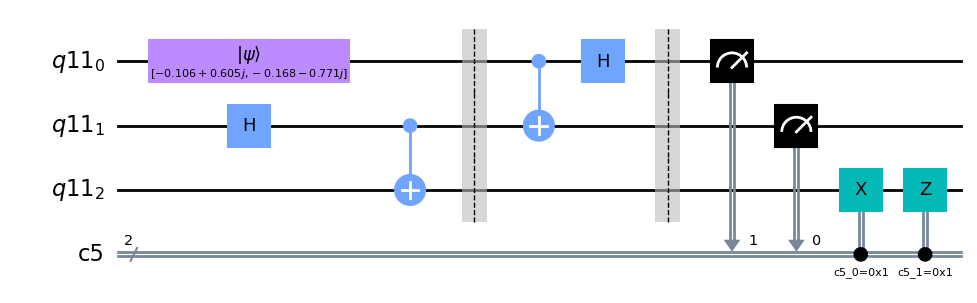

In [6]:
# Circuit for teleporting a pure state
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from qiskit.quantum_info import Statevector, random_statevector, partial_trace
import numpy as np
from math import sqrt

initial_state = random_statevector(2)

display(array_to_latex(initial_state, prefix = "\\text{ Initial State :  }"))
q = QuantumRegister(size = 3)
c = ClassicalRegister(size=2)
qc = QuantumCircuit(q, c)

qc.initialize(initial_state, 0)

qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure(0, 1)
qc.measure(1, 0)

qc.x(2).c_if(c[0], 1)
qc.z(2).c_if(c[1], 1)

qc.draw('mpl')

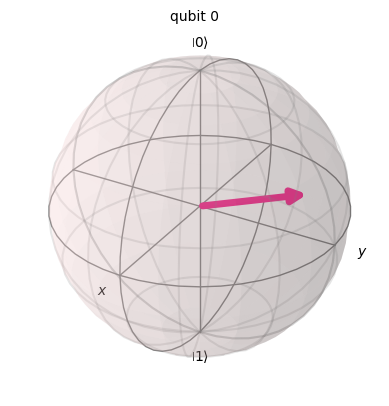

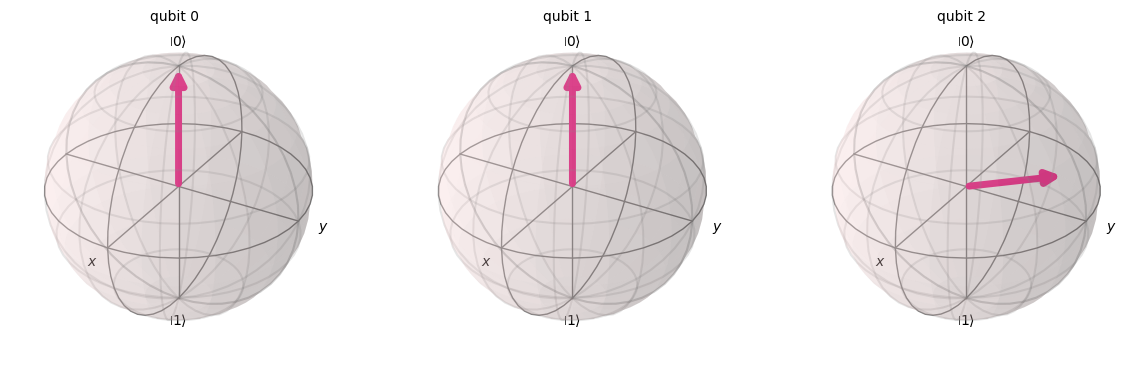

In [7]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
display(plot_bloch_multivector(initial_state))
display(plot_bloch_multivector(out_vector))

## Mixed States

Let's take this further by considering the problem of teleporting a mixed state from one person to another. 

It should be straightforward to see that you can't directly use the Quantum Teleportation Protocol, since it is assumed that the state to be teleported has a state $$ \alpha|0\rangle + \beta|1\rangle $$ which is a pure state vector.

Starting with a concrete example, let's look at transporting the qubit with density matrix $$ \frac{2}{3}|0\rangle \langle 0| + \frac{1}{3}|1\rangle \langle 1| $$ 

Can you design a protocol that uses Quantum Teleportation as a component to transport this mixed state from one person to another? Feel free to use ancilla qubits (could be qubits that are prepared in the states $|0\rangle$ or $|1\rangle$)

Hint : Maybe Schmidt Decompositions and Purifications would come in handy

Optional : You could code up the circuit in Qiskit as well

<IPython.core.display.Latex object>

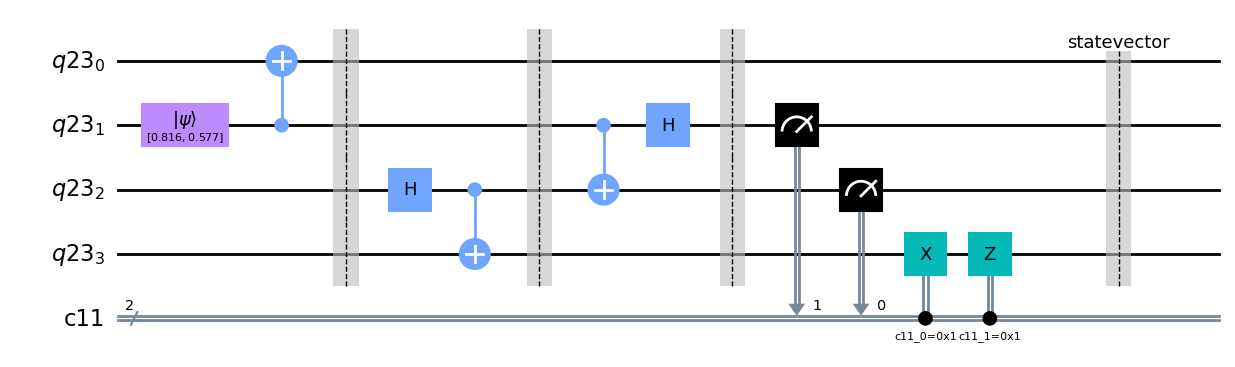

In [16]:
# Circuit for teleporting a pure state
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from qiskit.quantum_info import Statevector, random_statevector, partial_trace, DensityMatrix
import numpy as np
from math import sqrt

initial_state = [sqrt(2/3), sqrt(1/3)]

display(array_to_latex(initial_state, prefix = "\\text{ Initial State :  }"))
q = QuantumRegister(size = 4)
c = ClassicalRegister(size=2)
qc = QuantumCircuit(q, c)

qc.initialize(initial_state, 1)
qc.cx(1, 0)
qc.barrier()

qc.h(2)
qc.cx(2,3)
qc.barrier()

qc.cx(1, 2)
qc.h(1)
qc.barrier()

qc.measure(1, 1)
qc.measure(2, 0)

qc.x(3).c_if(c[0], 1)
qc.z(3).c_if(c[1], 1)

#Density = DensityMatrix.from_instruction(qc)
qc.save_statevector()
qc.draw('mpl')

In [17]:
sim = Aer.get_backend('aer_simulator')
results = sim.run(qc).result()
state_vec = results.get_statevector()
density_matrix = partial_trace(state_vec, [0,1,2])
display(array_to_latex(density_matrix))


<IPython.core.display.Latex object>